In [29]:
import sys
sys.path.append('/home/m.caros/work/3DSemanticSegmentation')

from utils import *
from utils_lora.MNIST_dataset import *
from src.LoRA.models.pointnet import *
from src.LoRA.models.lora_pointnet import *

In [30]:
path='/home/m.caros/work/3DSemanticSegmentation/src/LoRA/data/lora_results_rib.csv'
df = pd.read_csv(path, sep=';')
df = df.sort_values(by=['params'])
df

,rank,params,Surr IoU,Tower IoU,Lines IoU,Mean IoU
0,1,8407,99.99,60.06,64.30,74.79
1,2,16427,99.99,71.21,69.51,80.24
2,4,32467,99.98,70.99,72.37,81.12
3,8,64547,99.99,70.52,71.44,80.65
5,32,257027,99.99,76.45,78.53,84.94
6,64,513667,99.99,72.08,75.77,82.62
4,FT,966947,99.99,73.57,77.70,83.75


In [31]:
df[df['rank']=='FT']

,rank,params,Surr IoU,Tower IoU,Lines IoU,Mean IoU
4,FT,966947,99.99,73.57,77.7,83.75


In [32]:
params_ft = 966947
miou_ft = df[df['rank']=='FT']['Mean IoU']
tower_ft = df[df['rank']=='FT']['Tower IoU']
lines_ft = df[df['rank']=='FT']['Lines IoU']

miou_ft

4    83.75
Name: Mean IoU, dtype: float64

In [33]:
df = df[df['rank']!='FT']
params_lora=df['params']
miou_lora=df['Mean IoU']
tower_lora=df['Tower IoU']
lines_lora=df['Lines IoU']

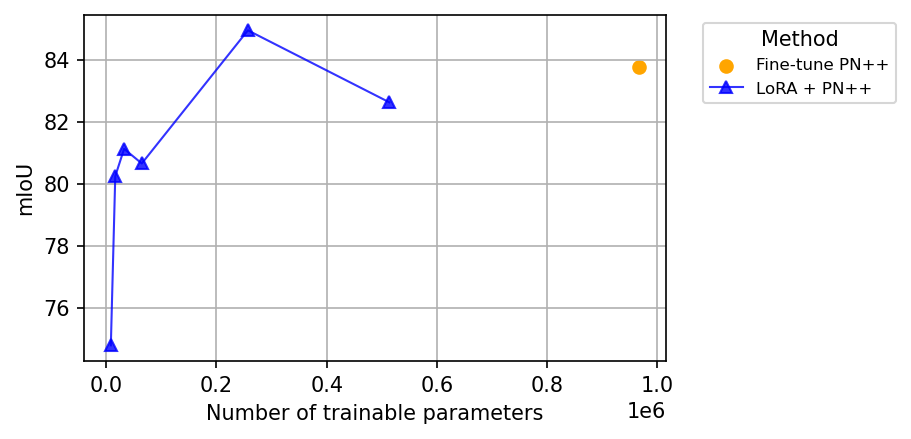

In [ ]:
fig, ax = plt.subplots(figsize=(5,3),dpi=150)


ax.scatter(params_ft, miou_ft, c = 'orange')
ax.plot(params_lora, miou_lora,  marker='^', color='blue', linestyle='-',linewidth=1, markersize=6,  alpha=0.4)

legend1 = ax.legend(['Fine-tune PN++', 'LoRA + PN++'],
                    bbox_to_anchor=(1.05, 1), loc='upper left', title="Method", fontsize=8)

ax.set_xlabel('Number of trainable parameters')
ax.set_ylabel('mIoU')
# ax.set_title('')
ax.grid(True)
plt.savefig('parameters_mIoU_LoRA_ft.png',dpi=150,bbox_inches='tight')
plt.show()

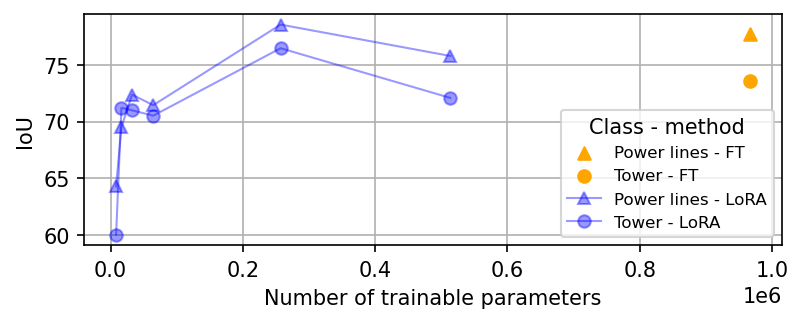

In [44]:
fig, ax = plt.subplots(figsize=(6,2),dpi=150)


ax.scatter(params_ft, lines_ft, c = 'orange', marker='^')
ax.scatter(params_ft, tower_ft, c = 'orange')
ax.plot(params_lora, lines_lora,  marker='^', color='blue', linestyle='-',linewidth=1, markersize=6,  alpha=0.4)
ax.plot(params_lora, tower_lora,  marker='o', color='blue', linestyle='-',linewidth=1, markersize=6,  alpha=0.4)

legend1 = ax.legend(['Power lines - FT', 'Tower - FT', 'Power lines - LoRA', 'Tower - LoRA'],
                    loc="lower right", title="Class - method", fontsize=8)

ax.set_xlabel('Number of trainable parameters')
ax.set_ylabel('IoU')
# ax.set_title('')
ax.grid(True)
plt.savefig('parameters_vs_tower_lines_iou_LoRA_ft.png',dpi=150,bbox_inches='tight')
plt.show()

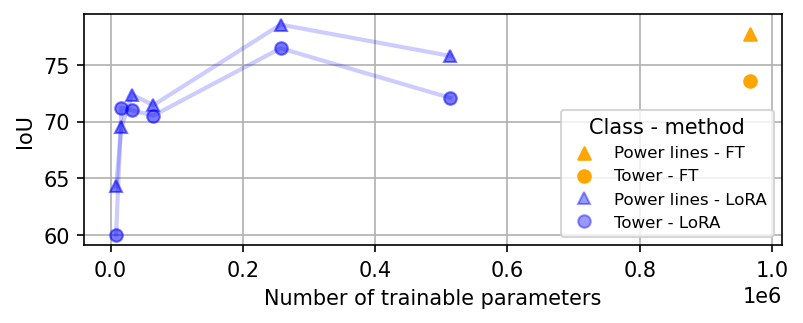

In [54]:
fig, ax = plt.subplots(figsize=(6,2),dpi=150)


ax.scatter(params_ft, lines_ft, c = 'orange', marker='^')
ax.scatter(params_ft, tower_ft, c = 'orange')
ax.plot(params_lora, lines_lora,  marker='^', color='blue', markersize=6,  alpha=0.4,linewidth=0)
ax.plot(params_lora, tower_lora,  marker='o', color='blue', markersize=6,  alpha=0.4,linewidth=0)

legend1 = ax.legend(['Power lines - FT', 'Tower - FT', 'Power lines - LoRA', 'Tower - LoRA'],
                    loc="lower right", title="Class - method", fontsize=8)

ax.plot(params_lora, lines_lora,  marker='^', color='blue', linestyle='-',linewidth=2, markersize=6,  alpha=0.2)
ax.plot(params_lora, tower_lora,  marker='o', color='blue', linestyle='-',linewidth=2, markersize=6,  alpha=0.2)


ax.set_xlabel('Number of trainable parameters')
ax.set_ylabel('IoU')
# ax.set_title('')
ax.grid(True)
plt.savefig('parameters_vs_tower_lines_iou_LoRA_ft.png',dpi=150,bbox_inches='tight')
plt.show()